# AMME5710 Week 3 Tutorial

This activity is to be completed during the Week 3 tutorial. When you have completed the activity, you will need to show your results to the tutor who will check your work and that you have sufficiently completed the task: this needs to be completed during the tutorial time, so make sure you are ready to show the tutors your work during the last hour of the tutorial.

**Tutorial Objectives and Instructions**:
- This tutorial will introduce you to concepts in morphological image analysis, spatial image filtering and edge detection.
- You should step through the example code snippets which explain and demonstrate the use of relevant functions in OpenCV.
- At the end of the notebook, there are several activities/exercises you will need to complete yourself. You can choose to:
    - Complete these inside the tutorial Jupyter Notebook using python code blocks
    - Write your own python code/scripts to produce the results requested

At any time, you can review the OpenCV documentation [https://docs.opencv.org/4.9.0/index.html](https://docs.opencv.org/4.9.0/index.html)l


In [44]:
# Import required modules
import cv2
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline 

## 1. Image Morphology Operations

During the Week 3 lecture, we discussed several techniques for enhancing and measuring properties from binary images, that would typically arise from thresholding operations. OpenCV provides several functions and methods that can be used for computing morphological operations on images, identifying distinct image regions and measuring their properties.

## Image Morphological Transformations in OpenCV
The functions "cv2.erode" and "cv2.dilate" provide simple erosion and dilation operations on binary images. For more complex morphological operations that compose multiple basis operations together (such as opening and closing), OpenCV provide the function "cv2.morphologyEx", which takes an input image, operation type and a kernel and returns the processed image:
```
output_image = cv2.morphologyEx(img, operation_type, kernel)
```
The "operation_type" is an OpenCV constant representing the type of operation (see [OpenCV Morphtypes](https://docs.opencv.org/4.9.0/d4/d86/group__imgproc__filter.html#ga7be549266bad7b2e6a04db49827f9f32)). The kernel can be any square numpy array of type uint8 which contains values of zeros or ones to indicate the shape of a desired structuring element. A kernel can also be built using the function "cv2.getStructuringElement" which allows the user to provide the desired shape type and size of the structuring element/kernel.

## Connected Components in OpenCV
Connected component analysis determines which regions in a binary image are connected/reachable from each other and can be used to identify single disconnected objects in a binary image. OpenCV provides the implementation:
```
num_components, label_img = cv2.connectedComponents(binary_img)
```
Which inputs a binary image and returns a "label_img", which contains the connected components of an image, as well as a number representing the number of components found. The algorithm cycles through each thresholded pixel and performs a “flood-fill”, until all pixels are labelled. This produces an image where pixels for a given blob have a common label number.

OpenCV also provides the function "cv2.connectedComponentsWithStats" which additionally returns shape properties associated with each identified component including the centroid, bounding box coordinates and area of each component:
```
(num_components, label_img, stats, centroids) = cv2.connectedComponentsWithStats(binary_img)
```
where "stats" is a numpy array which contains a number of properties/stats for each component. These can be accessed in the form "stats[i,property]" where "i" is the component index and "property" is an OpenCV constant corresponding to the property (see [ConnectedComponentTypes](https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#gac7099124c0390051c6970a987e7dc5c5)). For example, "stats[i, cv2.CC_STAT_AREA]" returns the computed area of component "i" (other types include CC_STAT_LEFT, CC_STAT_TOP, CC_STAT_WIDTH, CC_STAT_HEIGHT, CC_STAT_AREA).

## Contour finding in OpenCV
OpenCV provides the functions "cv2.findContours" and "cv2.drawContours" for extracting image contours and displaying them. Contours are sets of points that describe the boundary of (typically) binary regions in images, and can be used to assess their shape properties. Contours can be found using:
```
contours, hierarchy = cv2.findContours(binary_img, retrieval_mode, approx_mode)
```
where "retrieval_mode" and "approx_mode" configure the type of method used to extract the contour and approximate it's point set (see [OpenCV Retreival Modes](https://docs.opencv.org/3.4/d3/dc0/group__imgproc__shape.html#ga819779b9857cc2f8601e6526a3a5bc71) and [OpenCV Contour Approximation Modes](https://docs.opencv.org/3.4/d3/dc0/group__imgproc__shape.html#ga4303f45752694956374734a03c54d5ff)). For example:
```
contours, hierarchy = cv2.findContours(binary_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
```
Finds all contours using a tree-based format and returns point sets in the contours that remove redundant points along lines and other straight segments. The return variable "contours" contains a list of extracted contours, where each contour contains a list of the points that make up the contour as a numpy array.

The function "cv2.drawContours" can be used to visualise contours by drawing them to an image:
```
cv2.drawContours(im_draw, contours, index, colour, width)
```
where "im_draw" is the image that is annotated, "contours" is a list of extracted contours, "index" is the index of the list to draw (-1 to draw all contours) and colour and width control how the contour lines are drawn.

The code below illustrates some example application of these functions:

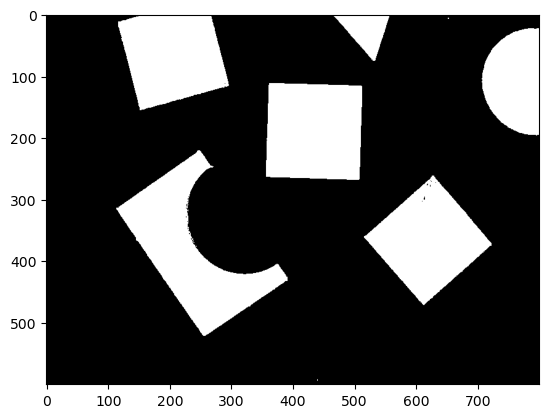

In [45]:
# Load an image and threshold using Otsu's method
im = cv2.imread('example_images_week3/figures.jpg')
im_gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
thresh_val_used, thresh_im1 = cv2.threshold(im_gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.imshow(thresh_im1, 'gray') # show the thresholded image

Number of contours found: 27


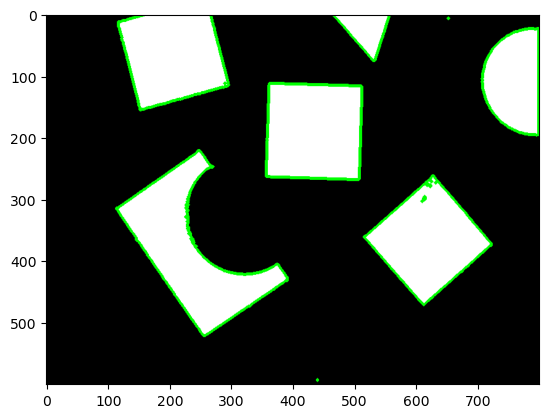

In [46]:
# Calculate contours in the binary image
contours, hierarchy = cv2.findContours(thresh_im1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# draw these contours to the image and display the number of extracted contours
im_temp = thresh_im1.copy()
im_temp = cv2.cvtColor(im_temp, cv2.COLOR_GRAY2RGB)
cv2.drawContours(im_temp, contours, -1, (0,255,0), 3) # draw using bright green

plt.imshow(im_temp, 'gray') # show the thresholded image

print("Number of contours found: %d"%(len(contours)))


Number of contours found: 6


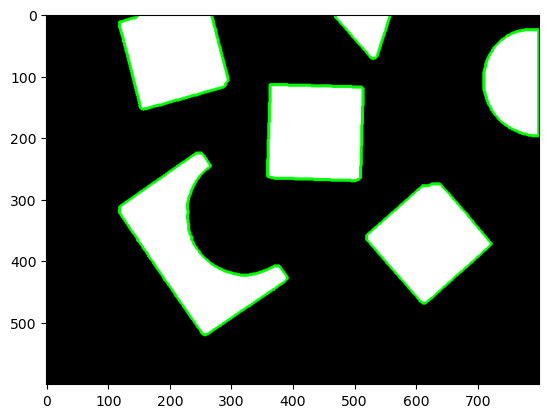

In [47]:
# Notice that 27 different contours have been found
# Many of these are the boundaries of "noisy" pixels in the binary thresholded image
# (see the square towards the bottom right of the image)

# We can remove these by performing some morphological operations (opening and closing) on the binary image first
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))
thresh_im2 = cv2.morphologyEx(thresh_im1, cv2.MORPH_OPEN, kernel)
thresh_im2 = cv2.morphologyEx(thresh_im2, cv2.MORPH_CLOSE, kernel)

# Calculate contours in the binary image (re-calculated on cleaned-up binary image)
contours, hierarchy = cv2.findContours(thresh_im2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# draw these contours to the image and display the number of extracted contours
im_temp = thresh_im2.copy()
im_temp = cv2.cvtColor(im_temp, cv2.COLOR_GRAY2RGB)
cv2.drawContours(im_temp, contours, -1, (0,255,0), 3) # draw using bright green

plt.imshow(im_temp, 'gray') # show the thresholded image

print("Number of contours found: %d"%(len(contours)))

OpenCV provide a variety of functions that can be used for calculating spatial properties of contours, such as the centroid, area, perimeter, convex hull, box/circle/ellipse fitting etc. The OpenCV documentation provides some additional examples on these functions here:
[https://docs.opencv.org/3.4/dd/d49/tutorial_py_contour_features.html](https://docs.opencv.org/3.4/dd/d49/tutorial_py_contour_features.html)

Found 7 connected components (including background)
Component properties:
Left, Top, Area:
0 0 370026
119 0 20725
469 0 3729
710 25 12621
359 114 23219
119 225 27888
520 275 21792


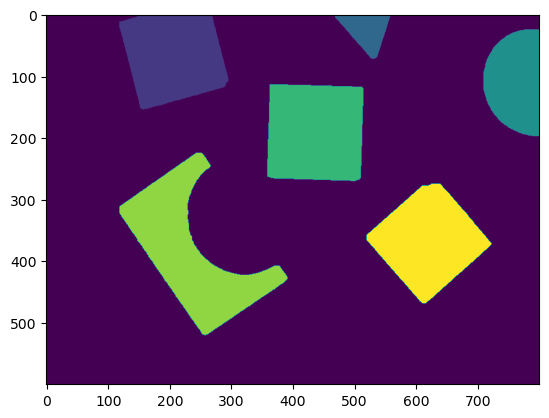

In [48]:
# Use connected components to find image regions and print their properties
(num_components, label_img, stats, centroids) = cv2.connectedComponentsWithStats(thresh_im2)
print("Found %d connected components (including background)"%(num_components))
print("Component properties:")
print("Left, Top, Area:")
for i in range(num_components):
    print(stats[i, cv2.CC_STAT_LEFT],stats[i, cv2.CC_STAT_TOP],stats[i, cv2.CC_STAT_AREA])

# Display components by colour map in label_img
plt.imshow(label_img)


## 2. Image Filtering

During the Week 3 lecture, we discussed image filtering. During filtering, a filter kernel is passed across every location in the image and used to compute a new image based on the interaction of the kernel with the image data. For linear filters, the resulting output value g(x,y) at each pixel is a weighted sum of the pixels underlying the kernel in each location (i.e. from f(x,y)), weighted by the corresponding values in the kernel itself h:

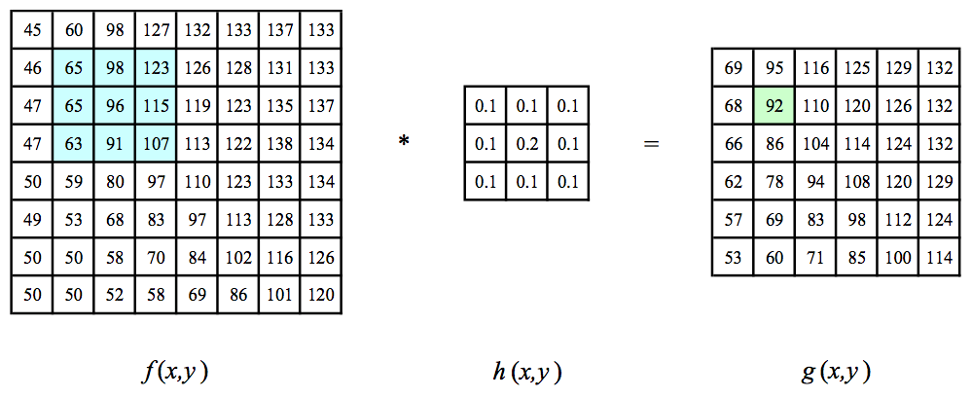

For non-linear filters, the operation performed can be more general. For example, a median filter computes at each pixel location the median of the values from the original image data that lie within the kernel mask.

OpenCV provides a variety of functions for image filtering:
- 'filter2D': perform linear filtering of an input image with a specified kernel.
- 'blur' or 'boxFilter': perform averaging filtering by specifying a kernel size.
- 'GaussianBlur': applies linear filtering with a Gaussian kernel.
- 'medianBlur': applies a median filter of a specified kernel size.

These functions are provided with an input image and different filtering options and return the filtered image. These functions return an image at the same dimensions as the input by producing pseudo-pixel data at the edges/border of the image when applying the filter. Several different options are available including treating pixels of the edge of the image as constant or as a reflected copy of the image data itself. See [OpenCV BORDER_TYPES](https://docs.opencv.org/4.9.0/d2/de8/group__core__array.html#ga209f2f4869e304c82d07739337eae7c5) for more details on border types available.

The code below illustrates some example application of these functions:

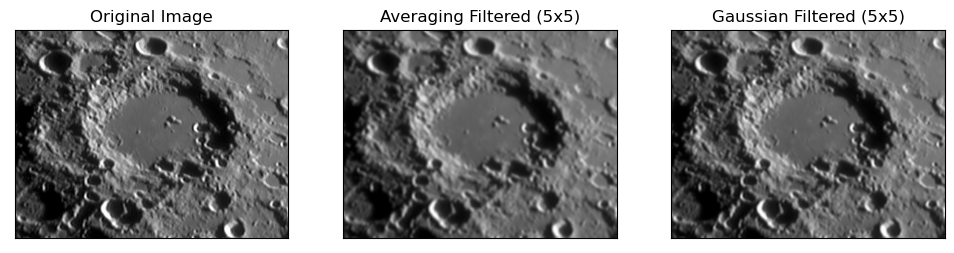

In [49]:
# Apply some different filters to an image
img = cv2.imread('example_images_week3/moon1.jpg')

kernel = (1/25.0)*np.ones((5,5)) # Create averaging filter kernel
im_filtered = cv2.filter2D(img, -1, kernel, borderType=cv2.BORDER_REFLECT_101)
# see: https://docs.opencv.org/4.9.0/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04

# (input image, kernel_size, sigma_x (leave as zero to automatically compute) )
im_filtered_gauss = cv2.GaussianBlur(img, (5,5), 0) 

plt.figure(figsize=(12, 7))
plt.subplot(131)
plt.imshow(img)
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.imshow(im_filtered)
plt.title('Averaging Filtered (5x5)')
plt.xticks([]), plt.yticks([])

plt.subplot(133)
plt.imshow(im_filtered_gauss)
plt.title('Gaussian Filtered (5x5)')
plt.xticks([]), plt.yticks([])

plt.show()

## 3. Image Edge Detection
Edges are locations in images at which the image intensity (or colour) changes sharply and are of interest in analysing images as they can correspond to the boundaries of objects or occluding contours. Edges correspond to high frequency regions of the image, and hence filters based on computing first and second-order derivative can be used to find edges. OpenCV provides several functions for identifying edges in images, include Sobel edge detectors (cv2.Sobel) and Canny edge detectors (cv2.Canny).

One simple strategy for finding edges is through the use of a Sobel kernel, which is used to approximate the gradient of an image. This can be achieved by constructing a 3x3 Sobel kernel (see Lecture notes Week 3) and filtering the image using 'cv2.filter2D', or by using the function 'cv2.Sobel', for example:
```
im_edges = cv2.Sobel(im, cv2.CV_64F, 1, 0, ksize=3)
```
Calculates the response of the input image 'im' to a 3x3 sobel kernel that approximates the first deriviative in the x-direction of the image. The second argument to 'Sobel' is the desired image data depth (which we set to 'cv2.CV_64F' to return the filtered output as a floating point representation, as filtered outputs can potentially taken on large positive or negative values). The third and fourth arguements represent the order of the derivative in the x and y directions (e.g. 'cv2.Sobel(im, cv2.CV_64F, 0, 1)' calculates the first order derivative in the y-direction), and the parameter 'ksize' specifies the kernel size to use.

Once a gradient is approximated in the x and y directions, you can calculate the overall magnitude (root sum of the squares) of the gradient vector and threshold this value to identify edges. The direction of the edge can also be computed from the components of the gradient vector (e.g. using the numpy function 'arctan2').

OpenCV also provides the function 'cv2.Canny' for computing the output from a Canny edge detection process. For example:
```
edges = cv2.Canny(im, 100, 100)
```
returns an image 'edges' which contains values of 255 for pixels that detected as edges using the input grayscale image 'im'. The second and third parameters correspond to the weak and strong thresholds used to threshold edges (all remaining pixels are either above the strong threshold or above the weak threshold AND connected to a strong pixel). 'Canny' also provide an additional optional arguement 'apertureSize' (default 3) which can be used to control the size of the Sobel kernel used during gradient approximation.


# Exercise/Activities to Complete
The following activities should be completed during the Friday tutorial and shown to your tutor to be marked off.


## Exercise 1: Basic object detection/counting

Load up the image "coins001.png". Write code to detect and count the number of coins in the image.
- Start by thresholding the image into coins vs. background: you might like to try using an Otsu thresholding method or develop your own threshold values
- Apply morphological operations, connected component analysis and/or contour finding to isolate each coin
- Use these methods to try and detect and count the number of coins in the image

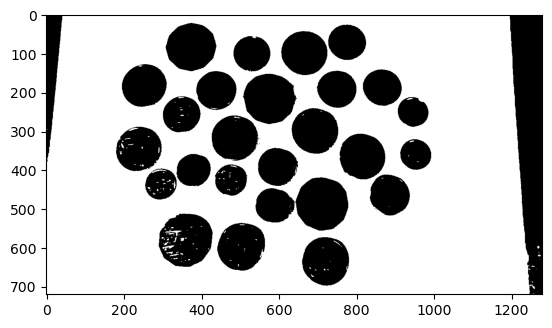

In [50]:
# Write your code here, or in a separate python script
# Load an image and threshold using Otsu's method
coins = cv2.imread('example_images_week3/coins001.png')
coins_gray = cv2.cvtColor(coins, cv2.COLOR_RGB2GRAY)
thresh_val_used, thresh_coins1 = cv2.threshold(coins_gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.imshow(thresh_coins1, 'gray') # show the thresholded image


Number of contours found: 21


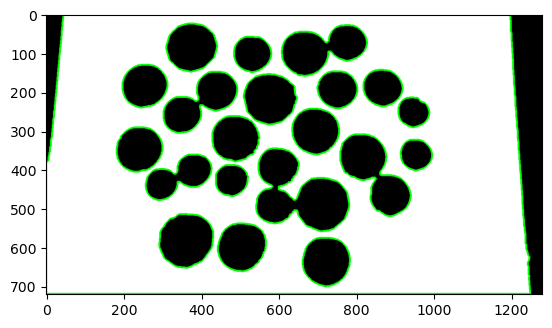

In [51]:
# Contour finding
# We can remove these by performing some morphological operations (opening and closing) on the binary image first
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))
thresh_coins2 = cv2.morphologyEx(thresh_coins1, cv2.MORPH_OPEN, kernel)
thresh_coins2 = cv2.morphologyEx(thresh_coins2, cv2.MORPH_CLOSE, kernel)

# Calculate contours in the binary image (re-calculated on cleaned-up binary image)
contours, hierarchy = cv2.findContours(thresh_coins2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# draw these contours to the image and display the number of extracted contours
coins_temp = thresh_coins2.copy()
coins_temp = cv2.cvtColor(coins_temp, cv2.COLOR_GRAY2RGB)
cv2.drawContours(coins_temp, contours, -1, (0,255,0), 3) # draw using bright green

plt.imshow(coins_temp, 'gray') # show the thresholded image

print("Number of contours found: %d"%(len(contours)))

## Exercise 2: Image filtering
Load up the image 'mountain.png'. We are going to corrupt this image with various types of noise and examine the effect of different filtering strategies for restoring the image.

Two simple functions are provided below for applying simple noise models to images. The function 'add_gaussian_noise' adds noise to each pixel in the image according to a zero-mean, Gaussian distribution, with standard deviation specified by the parameter 'sigma'. The function 'add_salt_pepper_noise' adds shot noise/salt and pepper noise (i.e. randomly selected pixels values become saturated up or down) based on a proportion of pixel specified by the parameter 'fraction'.

Use these functions to produce three different corrupted images:

```
im_gauss = add_gaussian_noise(im, sigma=0.01)
im_sp1 = add_salt_pepper_noise(im, fraction=0.05)
im_sp2 = add_salt_pepper_noise(im, fraction=0.2)
```

- Perform filtering on the image data using both a Gaussian filter and a median filter with a 3x3 kernel
- Produce plots that compare the original image data, the corrupted image data and the filtered image data for each of the three images and two filtering strategies
- Zoom into the filtered images: what do you notice about edge information in the filtered image? Have edges been preserved for both filtering strategies?



In [52]:
# Functions for approximating noise on images

def add_gaussian_noise(img, sigma=0.01):
    (h,w,d) = img.shape
    img = np.clip(img+np.random.normal(0, 255*sigma, (h,w,d)), 0, 255).astype('uint8')
    return img

def add_salt_pepper_noise(img, fraction=0.05):
    (h,w,d) = img.shape
    N = int(fraction*w*h)
    img2 = img.copy()
    img2[np.random.randint(0,h,N//2), np.random.randint(0,w,N//2), :] = 255
    img2[np.random.randint(0,h,N//2), np.random.randint(0,w,N//2), :] = 0
    return img2


Text(0.5, 1.0, 'Median Filter')

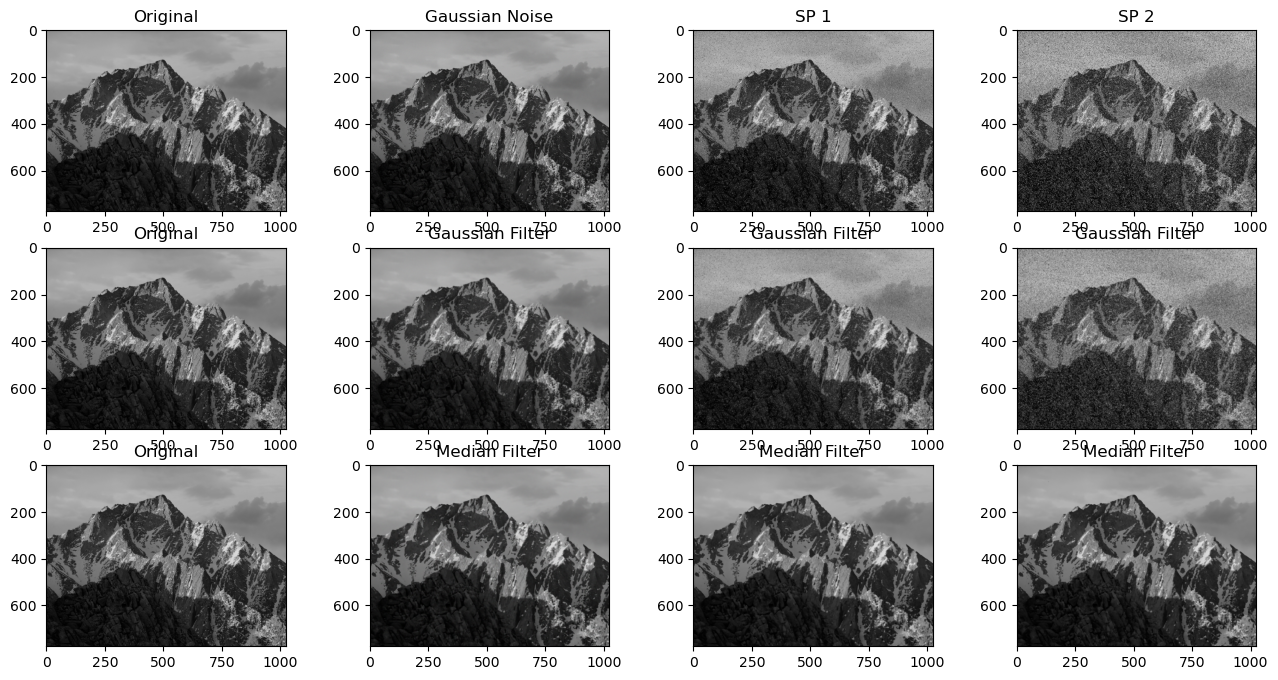

In [79]:
mountains = cv2.imread('example_images_week3/mountain.png')

mountains_gauss = add_gaussian_noise(mountains, sigma = 0.01)
mountains_sp1 = add_salt_pepper_noise(mountains, fraction=0.05)
mountains_sp2 = add_salt_pepper_noise(mountains, fraction=0.2)

plt.figure(figsize=(16, 8)) 

# Original image
plt.subplot(341)
plt.imshow(mountains)
plt.title("Original")

plt.subplot(345)
plt.imshow(mountains)
plt.title("Original")
plt.subplot(349)

plt.imshow(mountains)
plt.title("Original")

# Add image noise 
plt.subplot(342)
plt.imshow(mountains_gauss)
plt.title("Gaussian Noise")

plt.subplot(343)
plt.imshow(mountains_sp1)
plt.title("SP 1")

plt.subplot(344)
plt.imshow(mountains_sp2)
plt.title("SP 2")

# Apply Gaussian Image Filtering
plt.subplot(346)
m_filtered_gauss1 = cv2.GaussianBlur(mountains_gauss, (5,5), 0) 
plt.imshow(m_filtered_gauss1)
plt.title("Gaussian Filter")

plt.subplot(347)
m_filtered_gauss2 = cv2.GaussianBlur(mountains_sp1, (5,5), 0) 
plt.imshow(m_filtered_gauss2)
plt.title("Gaussian Filter")

plt.subplot(348)
m_filtered_gauss3 = cv2.GaussianBlur(mountains_sp2, (5,5), 0) 
plt.imshow(m_filtered_gauss3)
plt.title("Gaussian Filter")

# Apply Median Image Filtering
plt.subplot(3,4,10)
m_filtered_median1 = cv2.medianBlur(mountains_gauss, 5) 
plt.imshow(m_filtered_median1)
plt.title("Median Filter")

plt.subplot(3,4,11)
m_filtered_median2 = cv2.medianBlur(mountains_sp1, 5) 
plt.imshow(m_filtered_median2)
plt.title("Median Filter")

plt.subplot(3,4,12)
m_filtered_median3 = cv2.medianBlur(mountains_sp2, 5) 
plt.imshow(m_filtered_median3)
plt.title("Median Filter")





## Exercise 3: Image sharpening
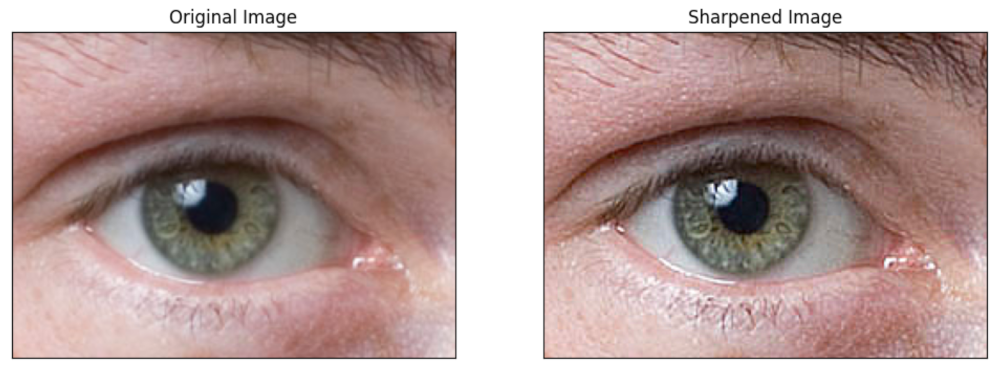
During the Week 3 lecture, we saw how filters could be used to sharpen images by subtracting a smoothed image from the original image and adding a scaled version of this back to the original image data:

$g = f + \gamma(f - f \circledast h)$

- Open up the images 'eye.jpg' and 'moon1.jpg'
- Apply image sharpening by (a) computing a filtered image using a 5 x 5 Gaussian kernel (b) taking the difference of between the image data and the filtered image (don’t forget to convert values to doubles first) and (c) scaling this by a value $\gamma$ (try values from about 0.8 to 5.0) and adding to the original image data.
- Experiment with different values for $\gamma$ and examine the effect.


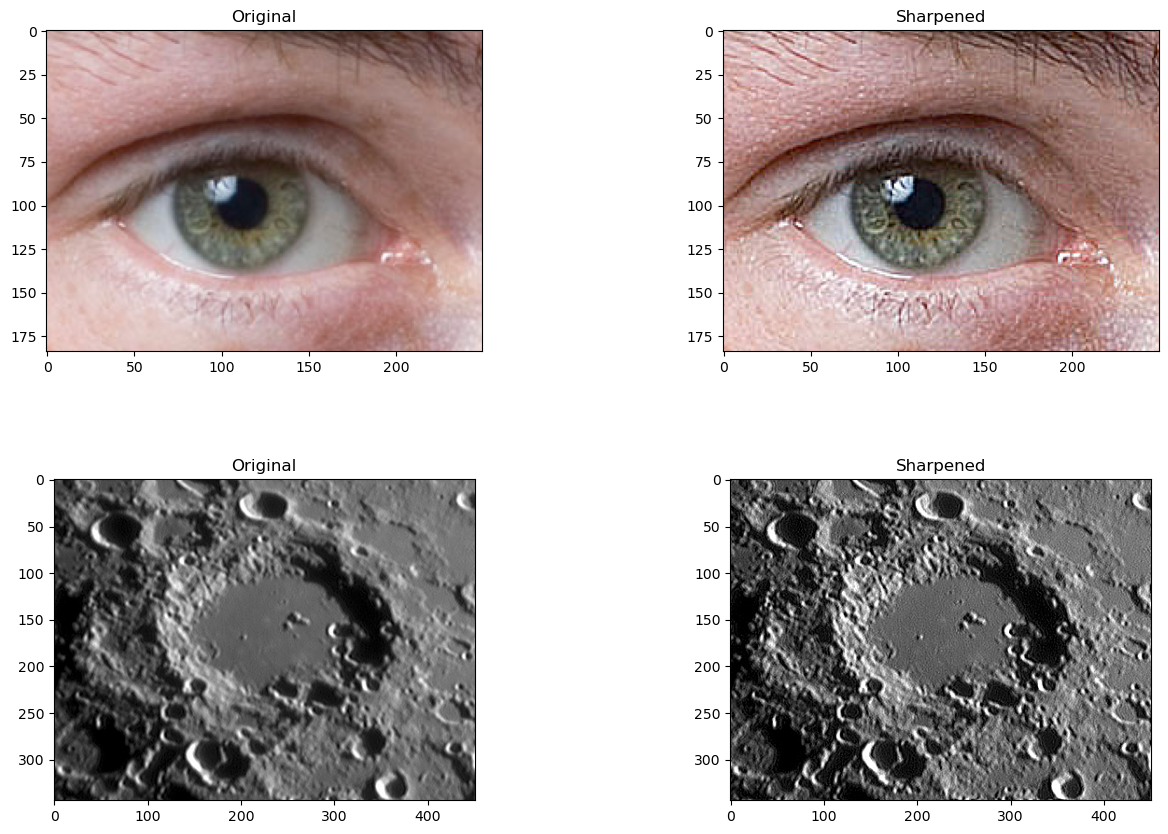

In [104]:
# Write your code here, or in a separate python script
eye = cv2.imread('example_images_week3/eye.jpg')
eye = cv2.cvtColor(eye, cv2.COLOR_BGR2RGB)
moon = cv2.imread('example_images_week3/moon1.jpg')

# Apply gaussian kernel 
eye_filtered = cv2.GaussianBlur(eye, (5,5), 0) 
moon_filtered = cv2.GaussianBlur(moon, (5,5), 0) 

# Take difference in image data 
alpha = 3
eye_sharpened = np.clip(np.double(eye) + alpha*(np.double(eye) - np.double(eye_filtered)), 0, 255).astype(np.uint8)
moon_sharpened = np.clip(np.double(moon) + alpha*(np.double(moon) - np.double(moon_filtered)), 0, 255).astype(np.uint8)

plt.figure(figsize=(16,10))
# Plot images
plt.subplot(221)
plt.imshow(eye)
plt.title("Original")

plt.subplot(222)
plt.imshow(eye_sharpened)
plt.title("Sharpened")

plt.subplot(223)
plt.imshow(moon)
plt.title("Original")

plt.subplot(224)
plt.imshow(moon_sharpened)
plt.title("Sharpened")

plt.subplots_adjust(hspace=0.4) 


## Exercise 4: Edge Detection
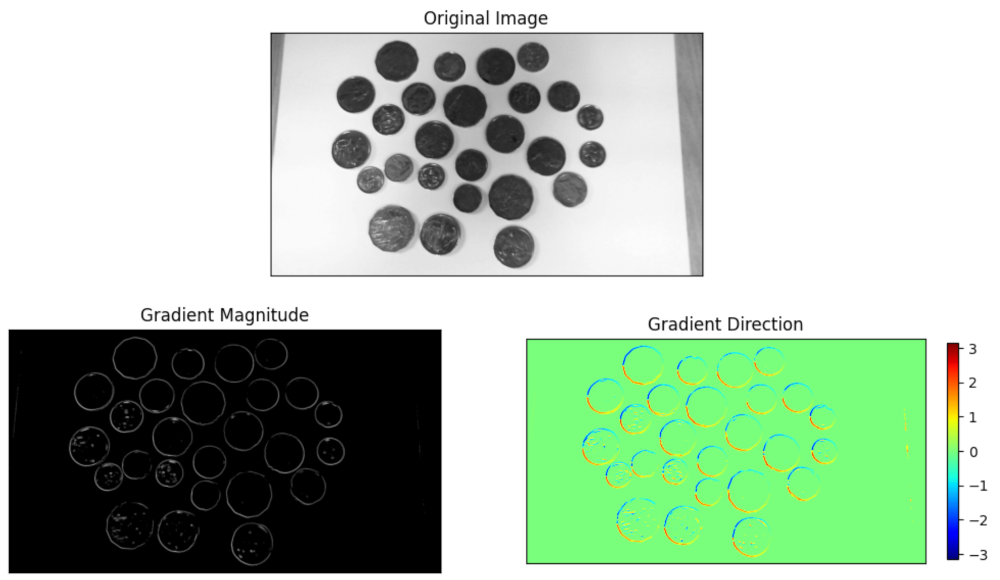
Load up the images 'figures.jpg', 'chess.png', 'coins001.png' and 'coins002.png'.

- Use both a Sobel and Canny edge detector to calculate the edges in these images and display the results.
- For Sobel edge detection, filter the image with both horizontal and vertical Sobel filters and threshold the gradient magnitude to locate edges. Produce a graph similar to above in which you display both the edge strength and direction for pixels that exceed the chosen gradient magnitude threshold.
- Experiment with the different parameters for the Canny edge detector in the function edge and see the effect of changing these. You should also experiment with pre-smoothing the image with different kernel sizes using a Gassian filter kernel. See if you can bring out the edges associated with the chess board while minimising noisy edges from the background.


In [56]:
# Write your code here, or in a separate python script


## Exercise 5 (optional): Spare change coin counter
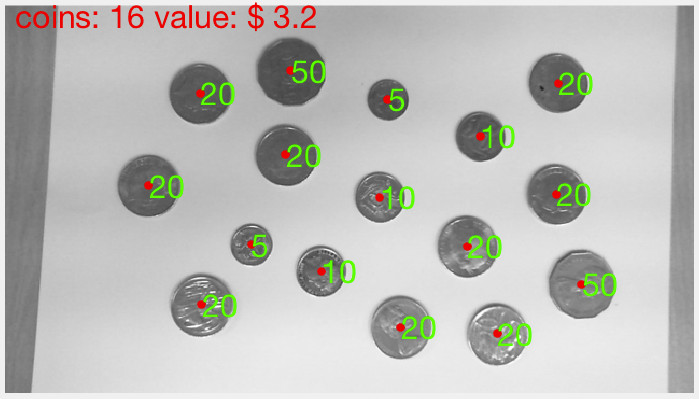

If you have completed the other exercises, you might like to try and extend your code in Exercise 1 to determining the size of each coin, which you can potentially use to estimate each coin's value and tally up the amount of spare change presented.
- Australian coins have unique sizes: for example, the diameters of the 5c, 10c, 20c and 50c coins are 20, 24, 28 and 32 mm respectively.
- If you had a properly calibrated camera and knew the precise distance from the camera to the surface on which the coins lie, you could compute their actual sizes from the image data, but since this data is not readily available, you will need to make some assumptions.
- One thing you could try is to assume that there is at least one 50c piece in the image. If you know the ratios in sizes of the other coins, and the find the largest coin in your list of connected components then you should be able to determine the types of the other coins based on their measured size. To deal with the fact that gold and silver coins don’t necessarily have distinct sizes, you may also need to use some sort of colour thresholding to distinguish these.

In [57]:
# Write your code here, or in a separate python script
